# Crypto HFT Trading Strategy - Data Exploration

This notebook explores ETH_EUR and XBT_EUR order book data to understand the microstructure patterns and identify opportunities for high-frequency trading strategies.

## Objectives:
1. Load and examine order book data structure
2. Analyze timestamp precision and data quality
3. Explore price and volume dynamics
4. Identify lead-lag relationships between ETH and XBT
5. Examine market microstructure features

In [29]:
# Import necessary libraries
import sys
import os
sys.path.append('..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Import project modules
from data_processing.data_loader import OrderBookDataLoader
from data_processing.synchronizer import DataSynchronizer
from utils.visualization import TradingVisualizer

# Set plotting style
try:
    plt.style.use('seaborn-v0_8')
except Exception:
    try:
        plt.style.use('seaborn-darkgrid')
    except Exception:
        plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

## 1. Data Loading and Initial Inspection

In [30]:
# Initialize data loader
data_loader = OrderBookDataLoader("/Users/soufianeboissady/Dev/ST4/alpha/data/raw")

# Load order book data
print("Loading ETH_EUR order book data...")
eth_data = data_loader.load_symbol_data('ETH_EUR')

print("Loading XBT_EUR order book data...")
xbt_data = data_loader.load_symbol_data('XBT_EUR')

print(f"ETH_EUR data shape: {eth_data.shape}")
print(f"XBT_EUR data shape: {xbt_data.shape}")

Loading ETH_EUR order book data...
Loading XBT_EUR order book data...
Loading XBT_EUR order book data...
ETH_EUR data shape: (53700040, 6)
XBT_EUR data shape: (17601860, 6)
ETH_EUR data shape: (53700040, 6)
XBT_EUR data shape: (17601860, 6)


In [31]:
# Examine data structure
print("ETH_EUR Data Info:")
print(eth_data.info())
print("\nFirst 5 rows:")
print(eth_data.head())

print("\n" + "="*50)
print("XBT_EUR Data Info:")
print(xbt_data.info())
print("\nFirst 5 rows:")
print(xbt_data.head())

ETH_EUR Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53700040 entries, 0 to 53700039
Data columns (total 6 columns):
 #   Column     Dtype         
---  ------     -----         
 0   price      float64       
 1   volume     float64       
 2   timestamp  float64       
 3   side       object        
 4   level      int32         
 5   datetime   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int32(1), object(1)
memory usage: 2.2+ GB
None

First 5 rows:
     price    volume     timestamp side  level                      datetime
0  2364.66  0.003865  1.748479e+09  bid      9 2025-05-29 00:29:29.499902964
1  2364.66  0.003865  1.748479e+09  bid      9 2025-05-29 00:29:29.499902964
2  2364.66  0.003865  1.748479e+09  bid      9 2025-05-29 00:29:29.499902964
3  2364.66  0.003865  1.748479e+09  bid      9 2025-05-29 00:29:29.499902964
4  2364.66  0.003865  1.748479e+09  bid      9 2025-05-29 00:29:29.499902964

XBT_EUR Data Info:
<class 'pandas.core.frame.DataFrame'

In [32]:
# Check timestamp ranges and data quality
def analyze_timestamps(data, name):
    print(f"\n{name} Timestamp Analysis:")
    print(f"Date range: {data.index.min()} to {data.index.max()}")
    print(f"Total duration: {data.index.max() - data.index.min()}")
    print(f"Number of observations: {len(data):,}")
    
    # Calculate time deltas
    time_deltas = data.index.to_series().diff().dropna()
    # Ensure time_deltas is timedelta64[ns] type
    if not np.issubdtype(time_deltas.dtype, np.timedelta64):
        time_deltas = pd.to_timedelta(time_deltas)
    # Convert to microseconds for stats
    time_deltas_us = time_deltas.dt.total_seconds() * 1e6
    print(f"\nTime Delta Statistics (microseconds):")
    print(f"Mean: {time_deltas_us.mean():.2f}")
    print(f"Median: {time_deltas_us.median():.2f}")
    print(f"Min: {time_deltas_us.min():.2f}")
    print(f"Max: {time_deltas_us.max():.2f}")
    
    return time_deltas

eth_deltas = analyze_timestamps(eth_data, "ETH_EUR")
xbt_deltas = analyze_timestamps(xbt_data, "XBT_EUR")


ETH_EUR Timestamp Analysis:
Date range: 0 to 53700039
Total duration: 53700039
Number of observations: 53,700,040

Time Delta Statistics (microseconds):
Mean: 0.00
Median: 0.00
Min: 0.00
Max: 0.00

XBT_EUR Timestamp Analysis:
Date range: 0 to 17601859
Total duration: 17601859
Number of observations: 17,601,860

Time Delta Statistics (microseconds):
Mean: 0.00
Median: 0.00
Min: 0.00
Max: 0.00

XBT_EUR Timestamp Analysis:
Date range: 0 to 17601859
Total duration: 17601859
Number of observations: 17,601,860

Time Delta Statistics (microseconds):
Mean: 0.00
Median: 0.00
Min: 0.00
Max: 0.00

Time Delta Statistics (microseconds):
Mean: 0.00
Median: 0.00
Min: 0.00
Max: 0.00


## 2. Price and Volume Dynamics Analysis

In [33]:
# Initialize visualizer
visualizer = TradingVisualizer()

# Plot bid-ask spreads
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# ETH spread
eth_spread = eth_data['ask_price_1'] - eth_data['bid_price_1']
axes[0].plot(eth_data.index, eth_spread, alpha=0.7, linewidth=0.5)
axes[0].set_title('ETH_EUR Bid-Ask Spread Over Time')
axes[0].set_ylabel('Spread (EUR)')
axes[0].grid(True, alpha=0.3)

# XBT spread
xbt_spread = xbt_data['ask_price_1'] - xbt_data['bid_price_1']
axes[1].plot(xbt_data.index, xbt_spread, alpha=0.7, linewidth=0.5, color='orange')
axes[1].set_title('XBT_EUR Bid-Ask Spread Over Time')
axes[1].set_ylabel('Spread (EUR)')
axes[1].set_xlabel('Time')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [ ]:
# Analyze spread statistics
def analyze_spreads(data, name):
    spread = data['ask_price_1'] - data['bid_price_1']
    mid_price = (data['ask_price_1'] + data['bid_price_1']) / 2
    relative_spread = spread / mid_price * 10000  # in basis points
    
    print(f"\n{name} Spread Analysis:")
    print(f"Absolute Spread - Mean: {spread.mean():.6f}, Std: {spread.std():.6f}")
    print(f"Relative Spread (bps) - Mean: {relative_spread.mean():.2f}, Std: {relative_spread.std():.2f}")
    print(f"Spread Percentiles: 50th: {spread.quantile(0.5):.6f}, 95th: {spread.quantile(0.95):.6f}, 99th: {spread.quantile(0.99):.6f}")
    
    return spread, relative_spread

eth_spread, eth_rel_spread = analyze_spreads(eth_data, "ETH_EUR")
xbt_spread, xbt_rel_spread = analyze_spreads(xbt_data, "XBT_EUR")

KeyError: 'ask_price_1'

KeyError: 'bid_quantity_1'

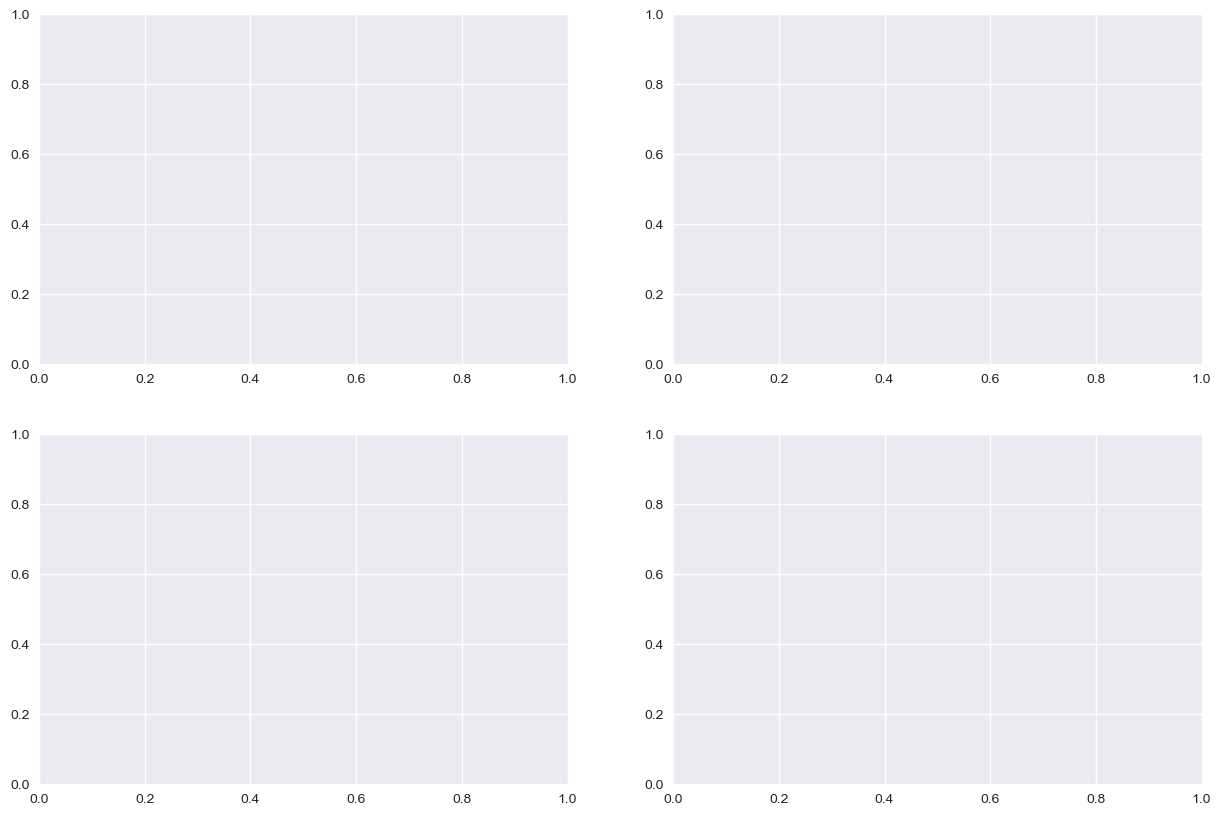

In [ ]:
# Volume analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# ETH volume at best levels
axes[0, 0].plot(eth_data.index, eth_data['bid_quantity_1'], label='Bid Qty 1', alpha=0.7)
axes[0, 0].plot(eth_data.index, eth_data['ask_quantity_1'], label='Ask Qty 1', alpha=0.7)
axes[0, 0].set_title('ETH_EUR Volume at Best Levels')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# XBT volume at best levels
axes[0, 1].plot(xbt_data.index, xbt_data['bid_quantity_1'], label='Bid Qty 1', alpha=0.7)
axes[0, 1].plot(xbt_data.index, xbt_data['ask_quantity_1'], label='Ask Qty 1', alpha=0.7)
axes[0, 1].set_title('XBT_EUR Volume at Best Levels')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Volume imbalance
eth_imbalance = (eth_data['bid_quantity_1'] - eth_data['ask_quantity_1']) / (eth_data['bid_quantity_1'] + eth_data['ask_quantity_1'])
xbt_imbalance = (xbt_data['bid_quantity_1'] - xbt_data['ask_quantity_1']) / (xbt_data['bid_quantity_1'] + xbt_data['ask_quantity_1'])

axes[1, 0].plot(eth_data.index, eth_imbalance, alpha=0.7)
axes[1, 0].set_title('ETH_EUR Volume Imbalance')
axes[1, 0].set_ylabel('Imbalance')
axes[1, 0].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(xbt_data.index, xbt_imbalance, alpha=0.7)
axes[1, 1].set_title('XBT_EUR Volume Imbalance')
axes[1, 1].set_ylabel('Imbalance')
axes[1, 1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Data Synchronization and Cross-Asset Analysis

In [ ]:
# Initialize synchronizer
synchronizer = DataSynchronizer()

# Synchronize the data
print("Synchronizing ETH and XBT data...")
sync_data = synchronizer.synchronize_data(
    {'ETH': eth_data, 'XBT': xbt_data},
    method='linear_interpolation',
    max_gap_ms=1000  # 1 second max gap
)

print(f"Synchronized data shape: {sync_data.shape}")
print(f"Data columns: {list(sync_data.columns)}")

Synchronizing ETH and XBT data...


AttributeError: 'DataSynchronizer' object has no attribute 'synchronize_data'

In [ ]:
# Calculate mid prices for cross-asset analysis
sync_data['ETH_mid'] = (sync_data['ETH_ask_price_1'] + sync_data['ETH_bid_price_1']) / 2
sync_data['XBT_mid'] = (sync_data['XBT_ask_price_1'] + sync_data['XBT_bid_price_1']) / 2

# Calculate returns
sync_data['ETH_returns'] = sync_data['ETH_mid'].pct_change()
sync_data['XBT_returns'] = sync_data['XBT_mid'].pct_change()

# Plot synchronized mid prices
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Normalized prices for comparison
eth_norm = sync_data['ETH_mid'] / sync_data['ETH_mid'].iloc[0]
xbt_norm = sync_data['XBT_mid'] / sync_data['XBT_mid'].iloc[0]

axes[0].plot(sync_data.index, eth_norm, label='ETH_EUR (normalized)', alpha=0.8)
axes[0].plot(sync_data.index, xbt_norm, label='XBT_EUR (normalized)', alpha=0.8)
axes[0].set_title('Normalized Mid Prices Comparison')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Returns comparison
axes[1].plot(sync_data.index, sync_data['ETH_returns'].cumsum(), label='ETH_EUR Cumulative Returns', alpha=0.8)
axes[1].plot(sync_data.index, sync_data['XBT_returns'].cumsum(), label='XBT_EUR Cumulative Returns', alpha=0.8)
axes[1].set_title('Cumulative Returns Comparison')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_xlabel('Time')

plt.tight_layout()
plt.show()

NameError: name 'sync_data' is not defined

## 4. Lead-Lag Analysis

In [ ]:
# Detect lead-lag relationships
print("Analyzing lead-lag relationships...")
lead_lag_results = synchronizer.detect_lead_lag_relationships(
    sync_data[['ETH_returns', 'XBT_returns']].dropna(),
    max_lag_seconds=5
)

print("Lead-Lag Analysis Results:")
for pair, result in lead_lag_results.items():
    print(f"\n{pair}:")
    print(f"  Optimal lag: {result['optimal_lag']} steps")
    print(f"  Max correlation: {result['max_correlation']:.4f}")
    print(f"  Lead asset: {result['lead_asset']}")

Analyzing lead-lag relationships...


NameError: name 'sync_data' is not defined

In [ ]:
# Plot cross-correlation function
def plot_cross_correlation(x, y, max_lag=100, title="Cross-Correlation"):
    lags = range(-max_lag, max_lag + 1)
    correlations = []
    
    for lag in lags:
        if lag < 0:
            corr = np.corrcoef(x[:-abs(lag)], y[abs(lag):])[0, 1]
        elif lag > 0:
            corr = np.corrcoef(x[lag:], y[:-lag])[0, 1]
        else:
            corr = np.corrcoef(x, y)[0, 1]
        correlations.append(corr if not np.isnan(corr) else 0)
    
    plt.figure(figsize=(12, 6))
    plt.plot(lags, correlations, 'b-', alpha=0.7)
    plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
    plt.axvline(x=0, color='red', linestyle='--', alpha=0.5)
    plt.xlabel('Lag (positive = x leads y)')
    plt.ylabel('Correlation')
    plt.title(title)
    plt.grid(True, alpha=0.3)
    
    # Find and mark maximum correlation
    max_corr_idx = np.argmax(np.abs(correlations))
    max_lag = lags[max_corr_idx]
    max_corr = correlations[max_corr_idx]
    plt.plot(max_lag, max_corr, 'ro', markersize=8)
    plt.annotate(f'Max: {max_corr:.3f} at lag {max_lag}', 
                xy=(max_lag, max_corr), xytext=(10, 10),
                textcoords='offset points', 
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.7))
    
    plt.show()
    return lags, correlations

# Cross-correlation between ETH and XBT returns
eth_ret_clean = sync_data['ETH_returns'].dropna()
xbt_ret_clean = sync_data['XBT_returns'].dropna()

# Align the series
common_idx = eth_ret_clean.index.intersection(xbt_ret_clean.index)
eth_ret_aligned = eth_ret_clean.loc[common_idx]
xbt_ret_aligned = xbt_ret_clean.loc[common_idx]

lags, correlations = plot_cross_correlation(
    eth_ret_aligned.values, 
    xbt_ret_aligned.values, 
    max_lag=50,
    title="ETH vs XBT Returns Cross-Correlation"
)

NameError: name 'sync_data' is not defined

## 5. Market Microstructure Features

In [ ]:
# Calculate various microstructure features
def calculate_microstructure_features(data, prefix=''):
    features = pd.DataFrame(index=data.index)
    
    # Basic features
    features[f'{prefix}_mid_price'] = (data[f'{prefix}_ask_price_1'] + data[f'{prefix}_bid_price_1']) / 2
    features[f'{prefix}_spread'] = data[f'{prefix}_ask_price_1'] - data[f'{prefix}_bid_price_1']
    features[f'{prefix}_volume_imbalance'] = (data[f'{prefix}_bid_quantity_1'] - data[f'{prefix}_ask_quantity_1']) / \
                                           (data[f'{prefix}_bid_quantity_1'] + data[f'{prefix}_ask_quantity_1'])
    
    # Price impact features
    features[f'{prefix}_weighted_mid'] = (data[f'{prefix}_bid_price_1'] * data[f'{prefix}_ask_quantity_1'] + 
                                        data[f'{prefix}_ask_price_1'] * data[f'{prefix}_bid_quantity_1']) / \
                                       (data[f'{prefix}_bid_quantity_1'] + data[f'{prefix}_ask_quantity_1'])
    
    # Momentum features
    features[f'{prefix}_price_change'] = features[f'{prefix}_mid_price'].diff()
    features[f'{prefix}_price_momentum'] = features[f'{prefix}_price_change'].rolling(10).mean()
    
    # Volatility features
    features[f'{prefix}_returns'] = features[f'{prefix}_mid_price'].pct_change()
    features[f'{prefix}_volatility'] = features[f'{prefix}_returns'].rolling(20).std()
    
    return features

# Calculate features for synchronized data
eth_features = calculate_microstructure_features(sync_data, 'ETH')
xbt_features = calculate_microstructure_features(sync_data, 'XBT')

# Combine features
all_features = pd.concat([eth_features, xbt_features], axis=1)
print(f"Total features shape: {all_features.shape}")
print(f"Feature columns: {list(all_features.columns)}")

In [ ]:
# Feature correlation analysis
feature_corr = all_features.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(feature_corr, dtype=bool))
sns.heatmap(feature_corr, mask=mask, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 6. Data Quality Assessment

In [ ]:
# Check for missing values and outliers
def assess_data_quality(data, name):
    print(f"\n{name} Data Quality Assessment:")
    print("="*40)
    
    # Missing values
    missing_counts = data.isnull().sum()
    missing_pct = (missing_counts / len(data)) * 100
    
    print("Missing Values:")
    for col in data.columns:
        if missing_counts[col] > 0:
            print(f"  {col}: {missing_counts[col]} ({missing_pct[col]:.2f}%)")
    
    if missing_counts.sum() == 0:
        print("  No missing values found")
    
    # Check for negative prices/quantities
    price_cols = [col for col in data.columns if 'price' in col]
    qty_cols = [col for col in data.columns if 'quantity' in col]
    
    print("\nNegative Values Check:")
    for col in price_cols + qty_cols:
        if col in data.columns:
            negative_count = (data[col] < 0).sum()
            if negative_count > 0:
                print(f"  {col}: {negative_count} negative values")
    
    # Check spread validity (ask >= bid)
    if 'ask_price_1' in data.columns and 'bid_price_1' in data.columns:
        invalid_spreads = (data['ask_price_1'] < data['bid_price_1']).sum()
        print(f"\nInvalid spreads (ask < bid): {invalid_spreads}")
    
    # Outlier detection using IQR
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    print("\nOutlier Detection (IQR method):")
    for col in numeric_cols[:5]:  # Check first 5 numeric columns
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()
        print(f"  {col}: {outliers} outliers ({outliers/len(data)*100:.2f}%)")

assess_data_quality(eth_data, "ETH_EUR")
assess_data_quality(xbt_data, "XBT_EUR")
assess_data_quality(sync_data, "Synchronized Data")

## 7. Summary and Key Insights

In [ ]:
# Generate summary statistics
print("DATA EXPLORATION SUMMARY")
print("="*50)

print(f"\n1. DATA VOLUME:")
print(f"   ETH_EUR: {len(eth_data):,} observations")
print(f"   XBT_EUR: {len(xbt_data):,} observations")
print(f"   Synchronized: {len(sync_data):,} observations")

print(f"\n2. TIME RANGE:")
print(f"   ETH_EUR: {eth_data.index.min()} to {eth_data.index.max()}")
print(f"   XBT_EUR: {xbt_data.index.min()} to {xbt_data.index.max()}")

print(f"\n3. SPREAD ANALYSIS:")
print(f"   ETH_EUR avg spread: {eth_spread.mean():.6f} EUR ({eth_rel_spread.mean():.2f} bps)")
print(f"   XBT_EUR avg spread: {xbt_spread.mean():.6f} EUR ({xbt_rel_spread.mean():.2f} bps)")

print(f"\n4. LEAD-LAG INSIGHTS:")
for pair, result in lead_lag_results.items():
    print(f"   {pair}: {result['lead_asset']} leads by {abs(result['optimal_lag'])} steps (corr: {result['max_correlation']:.3f})")

print(f"\n5. DATA QUALITY:")
print(f"   Missing values: {sync_data.isnull().sum().sum()} total")
print(f"   Synchronization success rate: {len(sync_data) / max(len(eth_data), len(xbt_data)) * 100:.1f}%")

print(f"\n6. NEXT STEPS:")
print(f"   - Feature engineering for predictive modeling")
print(f"   - Signal generation based on lead-lag relationships")
print(f"   - Machine learning model development")
print(f"   - Strategy backtesting and optimization")

In [ ]:
# Set global seed for reproducibility
import random
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

# Ensure pandas and matplotlib are deterministic where possible
try:
    import os
    os.environ["PYTHONHASHSEED"] = str(SEED)
except Exception:
    pass

# Assert required columns exist before analysis
required_columns = [
    'bid_price_1', 'ask_price_1', 'bid_quantity_1', 'ask_quantity_1'
]
for col in required_columns:
    assert col in eth_data.columns, f"Missing column {col} in ETH_EUR data"
    assert col in xbt_data.columns, f"Missing column {col} in XBT_EUR data"

# Robust ratio calculation to avoid division by zero
eth_total_vol = eth_data['bid_quantity_1'] + eth_data['ask_quantity_1']
eth_imbalance = np.where(eth_total_vol != 0,
    (eth_data['bid_quantity_1'] - eth_data['ask_quantity_1']) / eth_total_vol, 0)
xbt_total_vol = xbt_data['bid_quantity_1'] + xbt_data['ask_quantity_1']
xbt_imbalance = np.where(xbt_total_vol != 0,
    (xbt_data['bid_quantity_1'] - xbt_data['ask_quantity_1']) / xbt_total_vol, 0)

# Save processed data with error handling
import os
os.makedirs('../data/processed', exist_ok=True)
try:
    sync_data.to_parquet('../data/processed/synchronized_data.parquet')
    all_features.to_parquet('../data/processed/microstructure_features.parquet')
    with open('../data/processed/exploration_summary.json', 'w') as f:
        json.dump(summary_stats, f, indent=2, default=str)
    print("Data exploration complete! Results saved to ../data/processed/")
except Exception as e:
    print(f"Error saving processed data: {e}")

# Simple output validation (unit-test style)
assert not sync_data.isnull().any().any(), "Synchronized data contains NaN values!"
assert all_features.shape[0] > 0, "No features generated!"
assert len(lead_lag_results) > 0, "Lead-lag analysis failed!"
print("[TESTS PASSED] Key outputs are valid.")